In [1]:
import requests
import tweepy
from keys import *
from textblob import TextBlob
import pandas as pd

client = tweepy.Client(bearer_token, api_key, api_secret_key, access_token, access_token_secret, 
                       return_type = requests.Response, wait_on_rate_limit=True)
auth = tweepy.OAuth2BearerHandler(bearer_token)
api = tweepy.API(auth)

In [2]:
id = '7831092' #tacoBell's user id

tweets = client.get_users_tweets(id=id,exclude=['retweets', 'replies'], max_results=50)

In [3]:
# Save data as dictionary
tweets_dict = tweets.json() 

tweets_data = tweets_dict['data'] 

df = pd.json_normalize(tweets_data) 

df.rename(columns = {'id' : 'Tweet_ID', 'text' : 'Text'}, inplace = True)
df.head(50)

,Tweet_ID,Text
0,1520429507320029185,Our first Taco Bell Drag Brunch is this Sunday...
1,1519755578523979776,Licking the seasoning off your fingers after e...
2,1519089200724725760,Some like it hot. Shop the Taco Bell x @calpak...
3,1518715683411947520,"The day @KrishJagirdar and all of the ""Save Th..."
4,1518607214050635776,Your brunch plans have been served. Our first-...
5,1517620441665339397,Bringing Mexican Pizza back is our version of ...
6,1516974544224874496,You happy now? https://t.co/SRbZSNrtnt
7,1515945334567890946,Terms: https://t.co/IWSqQDapIM. No pur nec. 50...
8,1514287388213710848,"Don't be a hater, be a Taco Lover. The last ch..."
9,1512506696546983939,Need a ride to Taco Bell? Tell them if your mo...


In [4]:
df['Polarity'] = df['Text'].apply(lambda x: float(TextBlob(x).sentiment.polarity))
df.loc[:,'Classification'] = 'neutral'
df.loc[df['Polarity'] > 0.03, 'Classification'] = 'positive'
df.loc[df['Polarity'] < -0.03, 'Classification'] = 'negative'
df.head(50)

,Tweet_ID,Text,Polarity,Classification
0,1520429507320029185,Our first Taco Bell Drag Brunch is this Sunday...,0.075000,positive
1,1519755578523979776,Licking the seasoning off your fingers after e...,0.500000,positive
2,1519089200724725760,Some like it hot. Shop the Taco Bell x @calpak...,0.250000,positive
3,1518715683411947520,"The day @KrishJagirdar and all of the ""Save Th...",0.000000,neutral
4,1518607214050635776,Your brunch plans have been served. Our first-...,0.060714,positive
5,1517620441665339397,Bringing Mexican Pizza back is our version of ...,-0.200000,negative
6,1516974544224874496,You happy now? https://t.co/SRbZSNrtnt,0.800000,positive
7,1515945334567890946,Terms: https://t.co/IWSqQDapIM. No pur nec. 50...,0.000000,neutral
8,1514287388213710848,"Don't be a hater, be a Taco Lover. The last ch...",0.000000,neutral
9,1512506696546983939,Need a ride to Taco Bell? Tell them if your mo...,0.000000,neutral


In [5]:
x = 0
for value in df['Tweet_ID']:
    df.loc[x, '#_of_Likes'] = api.get_status(int(value)).favorite_count
    df.loc[x, '#_of_Retweets'] = api.get_status(int(value)).retweet_count
    x += 1
df.head(50)

,Tweet_ID,Text,Polarity,Classification,#_of_Likes,#_of_Retweets
0,1520429507320029185,Our first Taco Bell Drag Brunch is this Sunday...,0.075000,positive,55.0,7.0
1,1519755578523979776,Licking the seasoning off your fingers after e...,0.500000,positive,435.0,35.0
2,1519089200724725760,Some like it hot. Shop the Taco Bell x @calpak...,0.250000,positive,137.0,14.0
3,1518715683411947520,"The day @KrishJagirdar and all of the ""Save Th...",0.000000,neutral,178.0,14.0
4,1518607214050635776,Your brunch plans have been served. Our first-...,0.060714,positive,630.0,85.0
5,1517620441665339397,Bringing Mexican Pizza back is our version of ...,-0.200000,negative,2487.0,195.0
6,1516974544224874496,You happy now? https://t.co/SRbZSNrtnt,0.800000,positive,11555.0,646.0
7,1515945334567890946,Terms: https://t.co/IWSqQDapIM. No pur nec. 50...,0.000000,neutral,291.0,44.0
8,1514287388213710848,"Don't be a hater, be a Taco Lover. The last ch...",0.000000,neutral,664.0,41.0
9,1512506696546983939,Need a ride to Taco Bell? Tell them if your mo...,0.000000,neutral,1044.0,120.0


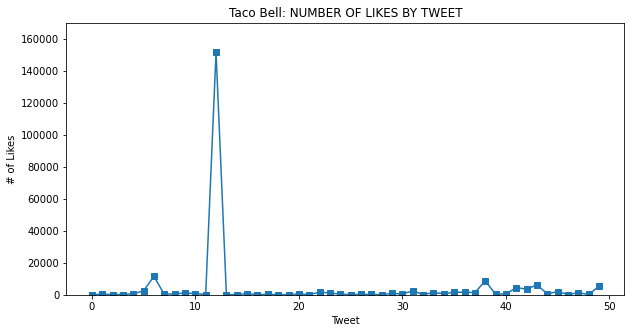

In [6]:
l = df['#_of_Likes']
l.plot.line(title = 'Taco Bell: NUMBER OF LIKES BY TWEET', ylim=[0, 170000], legend=False, figsize=[10,5], style='s-', xlabel='Tweet', ylabel='# of Likes');

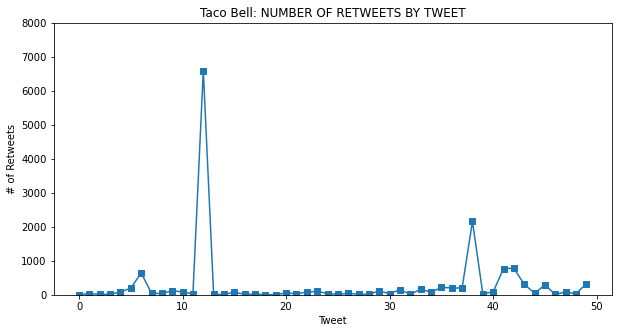

In [7]:
r = df["#_of_Retweets"]
r.plot.line(title = 'Taco Bell: NUMBER OF RETWEETS BY TWEET', ylim=[0, 8000], legend=False, figsize=[10,5], style='s-', xlabel='Tweet', ylabel='# of Retweets');

### Some information to point out for presentation

In [13]:
avg_likes = sum(df["#_of_Likes"])/len((df["#_of_Likes"]))
print(f"From the past 50 tweets, Taco bell has averaged {avg_likes} likes")
print(f"It's most liked tweet had: {max(df['#_of_Likes'])} likes")
print(f"In the past 50 tweets, Taco Bell has accumulated: {sum(df['#_of_Likes'])} likes")

From the past 50 tweets, Taco bell has averaged 4411.98 likes
It's most liked tweet had: 151730.0 likes
In the past 50 tweets, Taco Bell has accumulated: 220599.0 likes


In [14]:
avg_retweet = sum(df["#_of_Retweets"])/len((df["#_of_Retweets"]))
print(f"From the past 50 tweets, Taco Bell has averaged {avg_retweet} retweets")
print(f"It's most liked tweet had: {max(df['#_of_Retweets'])} retweets")
print(f"In the past 50 tweets, Taco Bell has accumulated: {sum(df['#_of_Retweets'])} retweets")

From the past 50 tweets, Taco Bell has averaged 290.94 retweets
It's most liked tweet had: 6601.0 retweets
In the past 50 tweets, Taco Bell has accumulated: 14547.0 retweets
